In [6]:
from pathlib import Path
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
COEF_DIR = Path("coefficients")
OUTPUT_FILE = "coefficents.png"

In [8]:
# with outliers (ends in _1)
files = {match.group(1): pd.read_csv(file, usecols = range(3), names = ["variable", "value", "std"], header = 0)
         for file in COEF_DIR.iterdir()
         if (match := re.fullmatch(r"params_(.*)_1.csv", file.name))}
df1 = pd.concat(files)
df1.index = df1.index.droplevel(1)
df1

# with outliers (ends in _2)
files = {match.group(1): pd.read_csv(file, usecols = range(3), names = ["variable", "value", "std"], header = 0)
         for file in COEF_DIR.iterdir()
         if (match := re.fullmatch(r"params_(.*)_2.csv", file.name))}
df2 = pd.concat(files)
df2.index = df2.index.droplevel(1)
df2

,variable,value,std
andrews,(Intercept),-22.230938,0.204704
andrews,prcp,8.566927,0.157896
andrews,snow,12.242838,0.104573
andrews,awnd,0.157369,0.010454
andrews,tmax,0.081545,0.001787
andrews,distance,-0.000346,0.000067
andrews,crs_dep_time_base10,0.684339,0.007355
huber,(Intercept),-25.696406,0.233795
huber,prcp,14.029219,0.180335
huber,snow,17.257957,0.119435


In [9]:
# # For latex tables

# M_ORDER = ["least_square", "least_abs_dev", "huber", "tukey", "andrews"]
# MAPPING = {
#     "(Intercept)": "intercept",
#     "prcp": "rain",
#     "awnd": "wind",
#     "tmax": "temp",
#     "distance": "dist",
#     "crs_dep_time_base10": "time"
# }
# latex = ""
# d = df2
# for variable in d.variable.unique():
#     variable2 = MAPPING.get(variable, variable)
#     latex += variable2 + " & "
#     dfv = d[d.variable == variable].reindex(M_ORDER)
#     for row in dfv.itertuples():
#         latex += f"{row[2]:.4f} & {row[3]:.4f} & "
#     latex = latex.removesuffix("& ")
#     latex += "\\\\\n"

# print(latex)

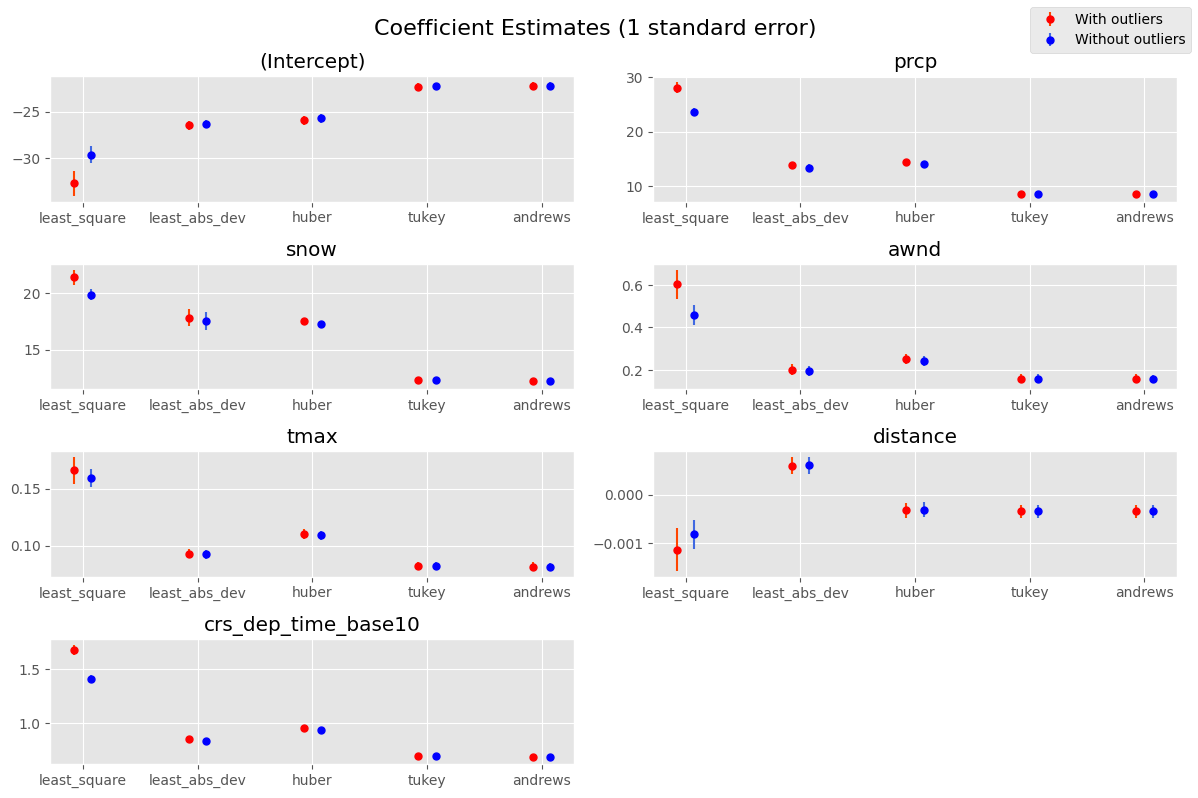

In [10]:
M_ORDER = ["least_square", "least_abs_dev", "huber", "tukey", "andrews"]

plt.style.use("ggplot")
fig, axs = plt.subplots(4, 2, figsize = (12, 8))

for i, variable in enumerate(df1.variable.unique()):
    ax = axs[i // 2, i % 2]
    df_variable = df1[df1.variable == variable].reindex(M_ORDER)
    df_variable2 = df2[df2.variable == variable].reindex(M_ORDER)

    xpos = np.arange(len(df_variable))
    offset = 0.075

    ax.errorbar(x = xpos - offset, y = df_variable.value, yerr = 2*df_variable["std"], linestyle = "", fmt = "o", ms = 5, color = "red", ecolor = "orangered")
    ax.errorbar(x = xpos + offset, y = df_variable2.value, yerr = 2*df_variable2["std"], linestyle = "", fmt = "o", ms = 5, color = "blue", ecolor = "royalblue")
    ax.set_xticks(xpos, M_ORDER)
    ax.set_title(variable)
axs[3, 1].axis("off")

plt.figlegend(["With outliers", "Without outliers"])
plt.suptitle("Coefficient Estimates (1 standard error)", fontsize = 16)

plt.tight_layout()
plt.savefig(OUTPUT_FILE, dpi = 200)
plt.show()